# Classification Problem - Covid 19 Chest X-ray

## Imports

In [236]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread


from keras import backend as K
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
%matplotlib inline

In [1]:
data = 'dataset'

In [238]:
os.listdir(data)

['covid', 'normal']

In [239]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

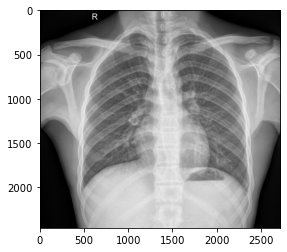

In [240]:
img = imread(test_path+'IM-0025-0001.jpeg')
plt.imshow(img, cmap='gray')

In [241]:
img_width = 150
img_ht = 150
ch =3

image_shape = (img_width, img_ht, ch)
epochs = 48
batch_size = 16

## Building a Model

In [412]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [413]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [414]:
model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_94 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_95 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 34, 34, 64)      

## Early Stopping

In [436]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)


In [437]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                               validation_split=0.3
                              )

In [438]:
train_image_gen = image_gen.flow_from_directory(data,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               subset='training')
test_image_gen = image_gen.flow_from_directory(data,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False,
                                               subset='validation')

Found 69 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [439]:
train_image_gen.class_indices

{'covid': 0, 'normal': 1}

In [440]:
import warnings
warnings.filterwarnings('ignore')

results = model.fit_generator(train_image_gen,epochs=epochs,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/48
5/5 [==============================] - 4s 725ms/step - loss: 0.6111 - accuracy: 0.7101 - val_loss: 0.5993 - val_accuracy: 0.7241
Epoch 2/48
5/5 [==============================] - 3s 522ms/step - loss: 0.6325 - accuracy: 0.7101 - val_loss: 0.5989 - val_accuracy: 0.7241
Epoch 3/48
5/5 [==============================] - 3s 515ms/step - loss: 0.6022 - accuracy: 0.7101 - val_loss: 0.5942 - val_accuracy: 0.7241
Epoch 4/48
5/5 [==============================] - 3s 512ms/step - loss: 0.6015 - accuracy: 0.7101 - val_loss: 0.5868 - val_accuracy: 0.7241
Epoch 5/48
5/5 [==============================] - 3s 506ms/step - loss: 0.5812 - accuracy: 0.7101 - val_loss: 0.5669 - val_accuracy: 0.7241
Epoch 6/48
5/5 [==============================] - 3s 579ms/step - loss: 0.5095 - accuracy: 0.6957 - val_loss: 0.6956 - val_accuracy: 0.4483
Epoch 7/48
5/5 [==============================] - 3s 503ms/step - loss: 0.5972 - accuracy: 0.6812 - val_loss: 0.4930 - val_accuracy: 0.8276
Epoch 8/48
5/5 [====

## Evaluation

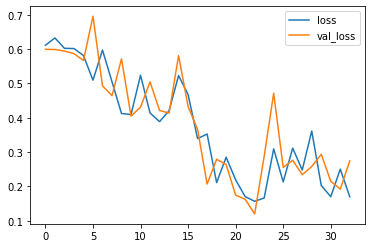

In [441]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [442]:
model.metrics_names

['loss', 'accuracy']

In [443]:
model.evaluate_generator(test_image_gen)

[0.11033045500516891, 0.9655172228813171]

In [444]:
pred_probabilities = model.predict_generator(test_image_gen)

In [445]:
pred_probabilities

array([[1.23494043e-04],
       [1.64543185e-02],
       [4.69434559e-01],
       [2.29932368e-03],
       [2.22801100e-05],
       [5.37192209e-05],
       [3.06709728e-04],
       [3.75024714e-02],
       [6.79654675e-03],
       [8.04435983e-02],
       [1.21993676e-01],
       [6.40248880e-02],
       [2.08027996e-05],
       [2.87368603e-05],
       [4.72721517e-01],
       [1.45584941e-04],
       [2.53773093e-01],
       [3.40708136e-03],
       [3.54680806e-01],
       [8.62833112e-05],
       [2.39122566e-02],
       [9.54835832e-01],
       [8.59003484e-01],
       [9.63304102e-01],
       [9.75231946e-01],
       [6.52774930e-01],
       [9.18300688e-01],
       [9.66712296e-01],
       [6.50447607e-01]], dtype=float32)

In [446]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [447]:
predictions = pred_probabilities > 0.5

In [448]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [449]:
confusion_matrix(test_image_gen.classes,predictions)

array([[21,  0],
       [ 0,  8]])

## New X-ray image 

In [450]:
my_covid_image = image.load_img('chest_resize_md.png',target_size=image_shape)

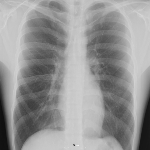

In [451]:
my_covid_image

In [452]:

my_covid_image = image.img_to_array(my_covid_image)
# type(my_covid_image)
my_covid_image.shape

(150, 150, 3)

In [453]:
my_covid_image = np.expand_dims(my_covid_image, axis=0)


In [454]:
my_covid_image.shape

(1, 150, 150, 3)

In [455]:
model.predict(my_covid_image)

array([[0.]], dtype=float32)

In [456]:
train_image_gen.class_indices

{'covid': 0, 'normal': 1}